## importing libraries and data

In [1]:
from potosnail import MachineLearning, DeepLearning, DataHelper, Evaluater
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

ml = MachineLearning()
dl = DeepLearning()
dh = DataHelper()
ev = Evaluater()

## creating dataframe

In [4]:
df = pd.DataFrame(load_breast_cancer()['data'])
df.columns = list(load_breast_cancer()['feature_names'])
df['malignant'] = load_breast_cancer()['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## checking for class imbalance

In [5]:
df['malignant'].value_counts()

1    357
0    212
Name: malignant, dtype: int64

## using SmoteIt to balance classes 

Smote isn't usually used on data with this low of class imbalance, this is just to demo

In [11]:
df2, y = dh.SmoteIt(df.drop(['malignant'], axis='columns'), df['malignant'])
df2['malignant'] = y
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df2['malignant'].value_counts()

1    357
0    357
Name: malignant, dtype: int64

## picking best model with CompareModels

In [14]:
ml.CompareModels(df2, 'malignant', 'classification')

[19:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,train_acc,test_acc
0,KNN,0.955140,0.916201
1,NB,0.936449,0.921788
2,DT,1.000000,0.949721
3,RF,1.000000,0.949721
4,AB,1.000000,0.955307
5,GB,1.000000,0.949721
6,XGB,1.000000,0.949721
7,Log,0.958879,0.927374
8,SVM,0.915888,0.871508


## Let's Optimize!!

Let's go with AB, AdaBoostClassifier :)

In [16]:
from sklearn.ensemble import AdaBoostClassifier

params = {'n_estimators': [10, 100], 'algorithm': ['SAMME', 'SAMME.R']}
clf = ml.Optimize(AdaBoostClassifier(), params, df2, 'malignant')
clf

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.2s finished


AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

Splitting data and Evaluating tuned models with HoldOut and ScoreModel

In [19]:
X, Xval = dh.HoldOut(df2.drop(['malignant'], axis='columns'))
y, yval = dh.HoldOut(df2['malignant'])
clf.fit(X, y)
ev.ScoreModel(clf, X, y)

'Training: 0.7401247401247402, Validation: 0.515527950310559'

## Using BuildConfusion for evaluation

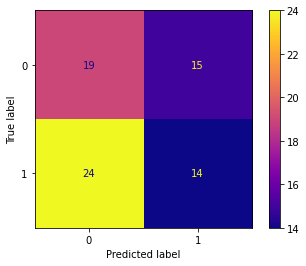

In [21]:
ev.BuildConfusion(clf, Xval, yval)

## Deep Learning approach

In [34]:
X, y = dh.SmoteIt(load_breast_cancer()['data'], load_breast_cancer()['target'])

## Model Building

You can use DeepLearning().FastNN() with task set to 'classification'

In [35]:
output_dim = 2 #because we have 2 classes (malignant and not malignant)
nodes = 64 #first layer will have 64 nodes
activation = 'relu' #Rectified Linear Unit activation function
regularizer = 'L2' #prevents overfitting
stacking = True #second layer will also have 64 nodes
dropout = False #another overfitting solution, we will not be using it this time
nlayers = 4 #neural network will have 4 layers
closer = False 
loss = 'binary_crossentropy' #best loss function for binary classification
optimizer = 'adam' #adaptive momentum estimation optimization function 
model = dl.DeepTabularClassification(output_dim, nodes, activation, regularizer, stacking,
                                     dropout, nlayers, closer, loss, optimizer)

visit https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ to read more about adam if you want

In [36]:
y2 = dl.MulticlassOutput(y) #using MulticlassOutput to encode labels
history = model.fit(X, y2, batch_size=32, epochs=75, validation_split=0.2)

Epoch 1/75
18/18 [==============================] - 1s 12ms/step - loss: 10.0636 - accuracy: 0.5535 - val_loss: 0.9216 - val_accuracy: 0.8112
Epoch 2/75
18/18 [==============================] - 0s 3ms/step - loss: 0.9122 - accuracy: 0.7005 - val_loss: 0.3832 - val_accuracy: 0.9161
Epoch 3/75
18/18 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.8995 - val_loss: 1.0008 - val_accuracy: 0.7552
Epoch 4/75
18/18 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8882 - val_loss: 1.0056 - val_accuracy: 0.7552
Epoch 5/75
18/18 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.8708 - val_loss: 0.2687 - val_accuracy: 0.9021
Epoch 6/75
18/18 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.9060 - val_loss: 0.7204 - val_accuracy: 0.7692
Epoch 7/75
18/18 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.9096 - val_loss: 0.3647 - val_accuracy: 0.8392
Epoch 8/75
18/18 [

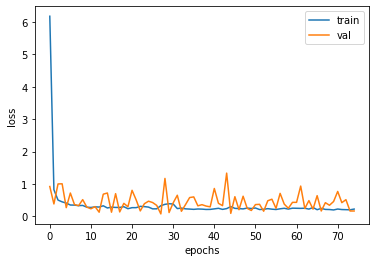

In [37]:
ev.ViewLoss(history, 75)

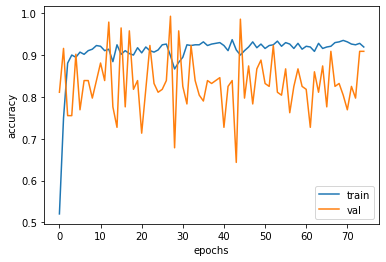

In [38]:
ev.ViewAccuracy(history, 75)

<AxesSubplot:xlabel='Predict', ylabel='True'>

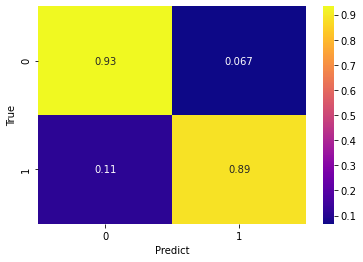

In [40]:
ev.BuildConfusionDL(model, X, y2)